<a href="https://colab.research.google.com/github/sabbirahmad00521/Machine-Learning-A-Z-Hands-On-Python-R-In-Data-Science-Udemy-/blob/master/05_SVR_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing (Template)

**Importing The libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing The Dataset**

In [0]:
dataset = pd.read_csv('Data.csv')
print(dataset)

X = dataset.iloc[:, :-1].values
print(X)

y = dataset.iloc[:, 3].values
print(y)

FileNotFoundError: ignored

**Taking care of missing data**

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])  
X[:, 1:3] = imputer.transform(X[:, 1:3])

print(X)


**Encoding Categorical Data**

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
print(X)

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
print(X)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

**Splitting The Dataset into the Training set and Test set**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 2. Regression 

### Simple Linear Regression

**Importing the dataset**

In [0]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

**Splitting the dataset into the Training set and Test set**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**Fitting Simple Linear Regression to the Training set**

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Test set results**

In [0]:
y_pred = regressor.predict(X_test)

**Visualising the Training set results**

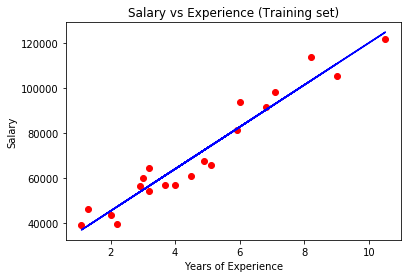

In [0]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Visualising the Test set results**

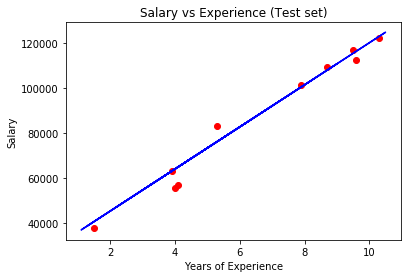

In [0]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Multiple Linear Regression

**Importing the dataset**

In [0]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

**Encoding Categorical Data**

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

**Avoid the Dummy Variable Trap**

In [0]:
X = X[:, 1:]

**Splitting the dataset into the Training set and Test set**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Fitting Multiline Linear Regression to the Training set**

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction the Test set results**

In [0]:
y_pred = regressor.predict(X_test)

**Building the optimal model using Backward Elimination**

In [0]:
import statsmodels.regression.linear_model as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sun, 22 Sep 2019   Prob (F-statistic):              0.829
Time:                        17:46:25   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.0

### Polynomial Regression

**Importing the dataset**

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

**Fitting Multiline Linear Regression to the Dataset**

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

**Fitting Polynomial Regression to the Dataset**

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

**Visualising  the Linear Regression Result**

In [0]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color ='blue')
plt.title('Truth of Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Visualising  the Polynomial Regression Result**

In [0]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title('Truth of Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Predicting a new result with Linear Regression**

In [0]:
lin_reg.predict(np.array([[6.5]]))

**Predicting a new result with Polynomial Regression**

In [0]:
lin_reg_2.predict(poly_reg.fit_transform(np.array([[6.5]])))

### SVR

**Importing the dataset**

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

**Feature Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

**Fitting SVR to the Dataset**

In [0]:
from sklearn.svm import SVR
regressor =  SVR(kernel = 'rbf')
regressor.fit(X,y)

**Predict a new result**

In [0]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

**Visualising  the SVR Regression Result**

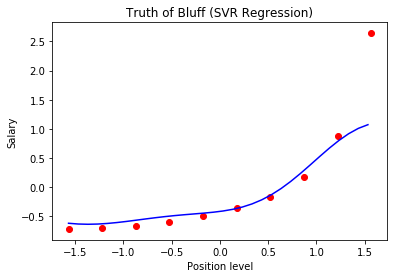

In [5]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='red')
plt.plot(X_grid,regressor.predict(X_grid), color ='blue')
plt.title('Truth of Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()